In [112]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import os
from sklearn.cluster import KMeans

In [113]:
SITE_NAME = "NEON.D01.HARV.DP1.00033"
YEAR      = 2019

In [114]:
def list_files(filepath, filetype):
   paths = []
   for root, dirs, files in os.walk(filepath):
      for file in files:
         if file.lower().endswith(filetype.lower()):
            paths.append(os.path.join(root, file))
   return(paths)

img_files = list_files(f'../data_raw/{SITE_NAME}/{YEAR}', ".jpg")
img_files.sort() # due to the way the file name is set up, sorting will sort it by date as well
img_files

['../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_02_120006.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_03_120006.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_04_120006.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_05_120006.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_06_120005.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_07_120006.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_08_120006.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_09_120005.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_10_120006.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.DP1.00033_2019_01_11_120006.jpg',
 '../data_raw/NEON.D01.HARV.DP1.00033/2019/01/NEON.D01.HARV.

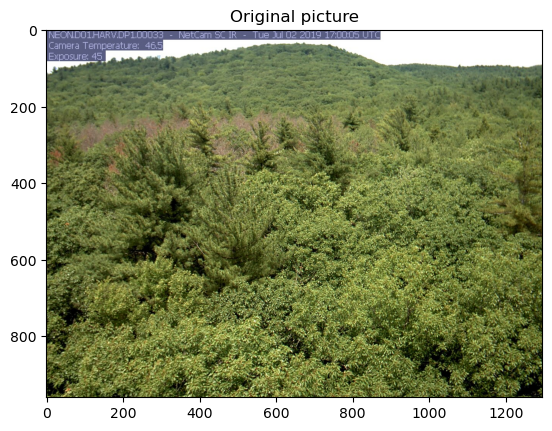

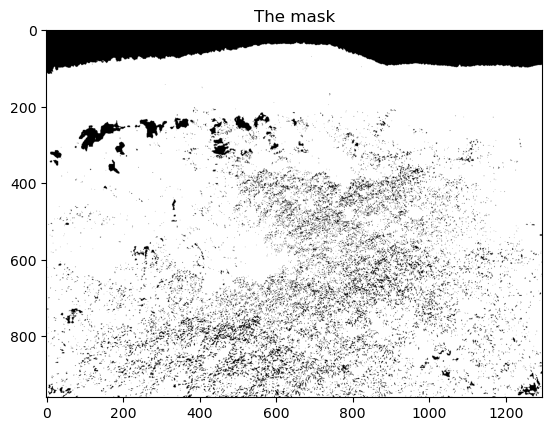

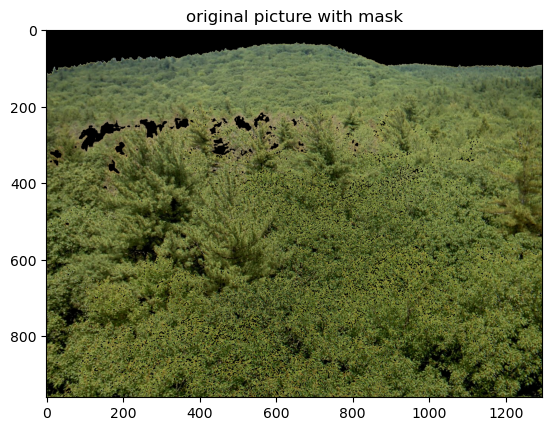

In [115]:
mid_img = "" # set the img you want at mid year here or it will become the first image in the year
mid_img = img_files[len(img_files)//2+1] if mid_img == "" else mid_img

mid_cv_img = cv2.imread(mid_img)

mid_rgb = cv2.cvtColor(mid_cv_img, cv2.COLOR_BGR2RGB)
mid_hsv = cv2.cvtColor(mid_cv_img, cv2.COLOR_BGR2HSV)
mid_mask = cv2.inRange(mid_hsv, (21,10,0), (110,255,173))

plt.imshow(mid_rgb)
plt.title("Original picture")
plt.show()

plt.imshow(mid_mask, cmap="gray")
plt.title("The mask")
plt.show()

mid_after_mask = cv2.bitwise_and(mid_rgb, mid_rgb, mask=mid_mask)
plt.imshow(mid_after_mask)
plt.title("original picture with mask")
plt.show()

# Run K means

In [126]:
def applyKMeansToImgWithConversion(img_name, conversion, backConversion):
    img = cv2.imread(img_name)
    img_after_mask = cv2.bitwise_and(img, img, mask=mid_mask)
    img_rgb = cv2.cvtColor(img_after_mask, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb)
    plt.title('original')
    plt.show()
    
    converted_img = cv2.cvtColor(img_after_mask, conversion)
    kMeanImgArray = np.float32(converted_img.reshape((-1,3)))
    kmeans = KMeans(n_clusters=8, random_state=0)
    fit_model = kmeans.fit(kMeanImgArray)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    centroid=kmeans.cluster_centers_
    
    print(centroid)
    
    print(centroid)
    
    labels=list(kmeans.labels_)
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    print(percent)
    plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
    plt.show()
    kMeanImg = np.uint8(pic2show).reshape((img.shape))
    back = cv2.cvtColor(kMeanImg, backConversion)
    
    back_img_rgb = cv2.cvtColor(back, cv2.COLOR_RGB2BGR)
    plt.imshow(back_img_rgb)
    plt.title('after')
    plt.show()

#     img = cv2.imread(img_name)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.bitwise_and(img, img, mask=mid_mask)
    
#     plt.imshow(img)
#     plt.title('before')
#     plt.show()
    
#     Z = img.reshape((-1,3))
#     # convert to np.float32
#     Z = np.float32(Z)
#     # define criteria, number of clusters(K) and apply kmeans()
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 15, 1.0)
#     K = 10
#     ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
#     # Now convert back into uint8, and make original image
#     center = np.uint32(center)
#     res = center[label.flatten()]
#     res2 = res.reshape((img.shape))
#     plt.imshow(res2)
#     plt.title('after')
#     plt.show()

    

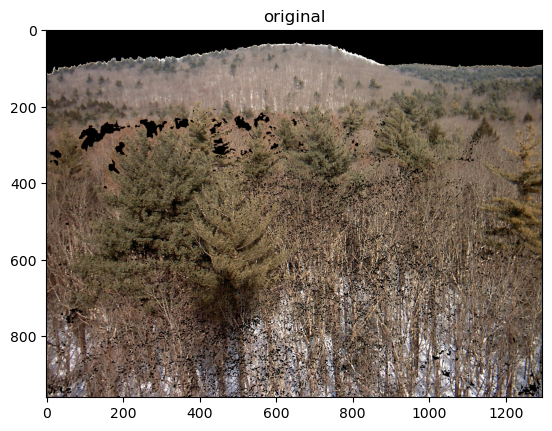

[[1.52871838e+01 8.84920654e+01 1.23985809e+02]
 [5.46169281e-02 1.29280090e-01 3.30657959e-02]
 [1.53377476e+01 2.07269272e+02 4.23527298e+01]
 [2.20047379e+01 3.52684555e+01 2.21844269e+02]
 [1.52154922e+01 5.17401047e+01 1.04238335e+02]
 [1.47156921e+02 2.94390793e+01 1.27471298e+02]
 [1.57591953e+01 1.16390419e+02 8.21155014e+01]
 [1.26780529e+01 5.22185020e+01 1.56903763e+02]]
[[ 1.23985809e+02 -8.05231982e+03 -1.08477744e+04]
 [ 3.30657959e-02  2.87949368e-02  2.87910476e-02]
 [ 4.23527298e+01 -6.49204688e+03 -8.73606641e+03]
 [ 2.21844269e+02 -4.73280420e+03 -7.60226025e+03]
 [ 1.04238335e+02 -3.92136816e+03 -5.28906396e+03]
 [-3.62516626e+03  1.27471298e+02 -1.92666443e+03]
 [ 8.21155014e+01 -6.96504492e+03 -9.47534180e+03]
 [ 1.56903763e+02 -6.30512842e+03 -8.03637549e+03]]
[0.2524000128600823, 0.14316084747942387, 0.03503086419753086, 0.0345751350308642, 0.12262008101851851, 0.04399112654320988, 0.17136622299382717, 0.19685570987654322]


ValueError: RGBA values should be within 0-1 range

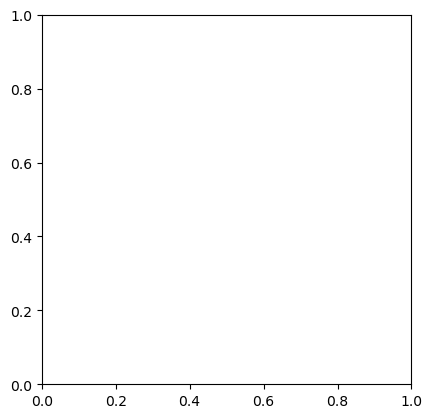

In [127]:
applyKMeansToImgWithConversion(img_files[30], cv2.COLOR_BGR2HSV, cv2.COLOR_HSV2BGR)

In [104]:
def elbow(img_name):
    img = cv2.imread(img_name)
    img_after_mask = cv2.bitwise_and(img, img, mask=mid_mask)
    img_rgb = cv2.cvtColor(img_after_mask, cv2.COLOR_BGR2RGB)
    img_rgb=img_rgb.reshape((img.shape[1]*img.shape[0],3))
    md=[]
    for i in range(1,21):
      kmeans=KMeans(n_clusters=i)
      kmeans.fit(img_rgb)
      o=kmeans.inertia_
      md.append(o)
    plt.plot(list(np.arange(1,21)),md)
    plt.show()

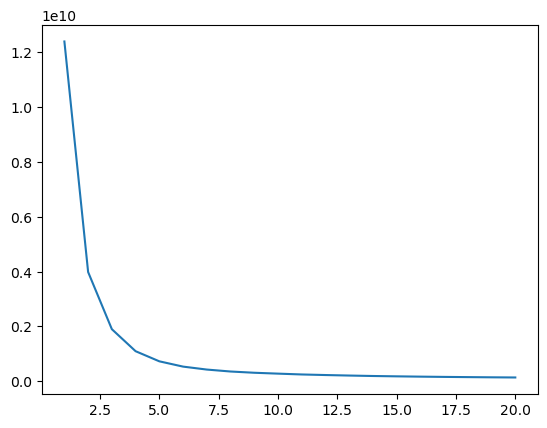

In [105]:
elbow(img_files[15])